# Machine Learning #2

## Forum Session 8.1

Open a Jupyter notebook (local or cloud-based)

- Load the automobile.csv dataset as a Pandas dataframe. Make sure it is loaded so that '?' fields are interepreted as missing values.

- View the head (first 10 rows) of the dataframe

- View a description of the dataframe.

- Throw away the categorical features, keep only the numericals (for the purpose of this exercise).

- Throw away a meaningless feature with name "Unnamed: 0"

- View histograms of the numerical features

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=None, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=None, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression: 'CompressionOptions' = 'infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_li

In [3]:
#loading the df
df= pd.read_csv('automobile.csv', na_values="?")

In [4]:
#exploring the df
df.head(10)

,Unnamed: 0,Normalized-losses,Make,Fuel-type,Aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Wheel-base,...,Fuel-system,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price,Risk
0,0,168.0,toyota,gas,std,two,sedan,rwd,front,94.5,...,2bbl,3.19,3.03,9.0,70.0,4800.0,29,34,8058.0,1
1,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,2bbl,3.08,3.15,9.0,68.0,5000.0,31,38,7395.0,1
2,2,87.0,toyota,gas,std,two,hatchback,fwd,front,95.7,...,2bbl,3.05,3.03,9.0,62.0,4800.0,35,39,5348.0,1
3,3,125.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,2bbl,3.35,3.46,8.5,88.0,5000.0,25,32,6989.0,1
4,4,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0,1
5,5,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0,3
6,6,194.0,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,mpfi,3.43,3.27,7.8,200.0,5200.0,17,23,19699.0,3
7,7,NaN,jaguar,gas,std,two,sedan,rwd,front,102.0,...,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.0,0
8,8,128.0,nissan,gas,std,four,sedan,fwd,front,100.4,...,mpfi,3.43,3.27,9.0,152.0,5200.0,17,22,13499.0,0
9,9,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,idi,3.70,3.52,21.0,95.0,4150.0,28,33,16900.0,0


In [5]:
#shape of the df
df.shape

(205, 27)

In [6]:
#description of the df
df.describe()

,Unnamed: 0,Normalized-losses,Wheel-base,Length,Width,Height,Curb-weight,Engine-size,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price,Risk
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000,205.000000
mean,102.000000,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353,0.834146
std,59.322565,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342,1.245307
min,0.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,-2.000000
25%,51.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,0.000000
50%,102.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,1.000000
75%,153.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,2.000000
max,204.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,3.000000


In [7]:
#exploring data types and number of records/null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         205 non-null    int64  
 1   Normalized-losses  164 non-null    float64
 2   Make               205 non-null    object 
 3   Fuel-type          205 non-null    object 
 4   Aspiration         205 non-null    object 
 5   Num-of-doors       203 non-null    object 
 6   Body-style         205 non-null    object 
 7   Drive-wheels       205 non-null    object 
 8   Engine-location    205 non-null    object 
 9   Wheel-base         205 non-null    float64
 10  Length             205 non-null    float64
 11  Width              205 non-null    float64
 12  Height             205 non-null    float64
 13  Curb-weight        205 non-null    int64  
 14  Engine-type        205 non-null    object 
 15  Num-of-cylinders   205 non-null    object 
 16  Engine-size        205 non

In [8]:
##selecting only categorical columns
cat_columns = df.select_dtypes(include='object')
cat_columns

,Make,Fuel-type,Aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Engine-type,Num-of-cylinders,Fuel-system
0,toyota,gas,std,two,sedan,rwd,front,ohc,four,2bbl
1,mazda,gas,std,four,sedan,fwd,front,ohc,four,2bbl
2,toyota,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
3,mitsubishi,gas,std,four,sedan,fwd,front,ohc,four,2bbl
4,dodge,gas,turbo,NaN,sedan,fwd,front,ohc,four,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
201,mercedes-benz,gas,std,four,sedan,rwd,front,ohcv,eight,mpfi
202,nissan,gas,std,two,sedan,fwd,front,ohc,four,2bbl
203,porsche,gas,std,two,hatchback,rwd,front,ohc,four,mpfi


In [9]:
##selecting only numerical columsn
num_df = df.select_dtypes(include=['int64', 'float64'])
num_df

,Unnamed: 0,Normalized-losses,Wheel-base,Length,Width,Height,Curb-weight,Engine-size,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price,Risk
0,0,168.0,94.5,168.7,64.0,52.6,2169,98,3.19,3.03,9.0,70.0,4800.0,29,34,8058.0,1
1,1,113.0,93.1,166.8,64.2,54.1,1950,91,3.08,3.15,9.0,68.0,5000.0,31,38,7395.0,1
2,2,87.0,95.7,158.7,63.6,54.5,1985,92,3.05,3.03,9.0,62.0,4800.0,35,39,5348.0,1
3,3,125.0,96.3,172.4,65.4,51.6,2365,122,3.35,3.46,8.5,88.0,5000.0,25,32,6989.0,1
4,4,148.0,93.7,157.3,63.8,50.6,2191,98,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,65.0,102.4,175.6,66.5,54.9,2414,122,3.31,3.54,8.7,92.0,4200.0,27,32,10898.0,-1
201,201,NaN,115.6,202.6,71.7,56.5,3740,234,3.46,3.10,8.3,155.0,4750.0,16,18,34184.0,-1
202,202,128.0,94.5,165.3,63.8,54.5,1918,97,3.15,3.29,9.4,69.0,5200.0,31,37,6649.0,1
203,203,186.0,94.5,168.9,68.3,50.2,2778,151,3.94,3.11,9.5,143.0,5500.0,19,27,22018.0,3


In [10]:
## dropping column "Unnamed"
num_df.drop(columns='Unnamed: 0', axis=1, inplace=True)

num_df


,Normalized-losses,Wheel-base,Length,Width,Height,Curb-weight,Engine-size,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price,Risk
0,168.0,94.5,168.7,64.0,52.6,2169,98,3.19,3.03,9.0,70.0,4800.0,29,34,8058.0,1
1,113.0,93.1,166.8,64.2,54.1,1950,91,3.08,3.15,9.0,68.0,5000.0,31,38,7395.0,1
2,87.0,95.7,158.7,63.6,54.5,1985,92,3.05,3.03,9.0,62.0,4800.0,35,39,5348.0,1
3,125.0,96.3,172.4,65.4,51.6,2365,122,3.35,3.46,8.5,88.0,5000.0,25,32,6989.0,1
4,148.0,93.7,157.3,63.8,50.6,2191,98,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,65.0,102.4,175.6,66.5,54.9,2414,122,3.31,3.54,8.7,92.0,4200.0,27,32,10898.0,-1
201,NaN,115.6,202.6,71.7,56.5,3740,234,3.46,3.10,8.3,155.0,4750.0,16,18,34184.0,-1
202,128.0,94.5,165.3,63.8,54.5,1918,97,3.15,3.29,9.4,69.0,5200.0,31,37,6649.0,1
203,186.0,94.5,168.9,68.3,50.2,2778,151,3.94,3.11,9.5,143.0,5500.0,19,27,22018.0,3


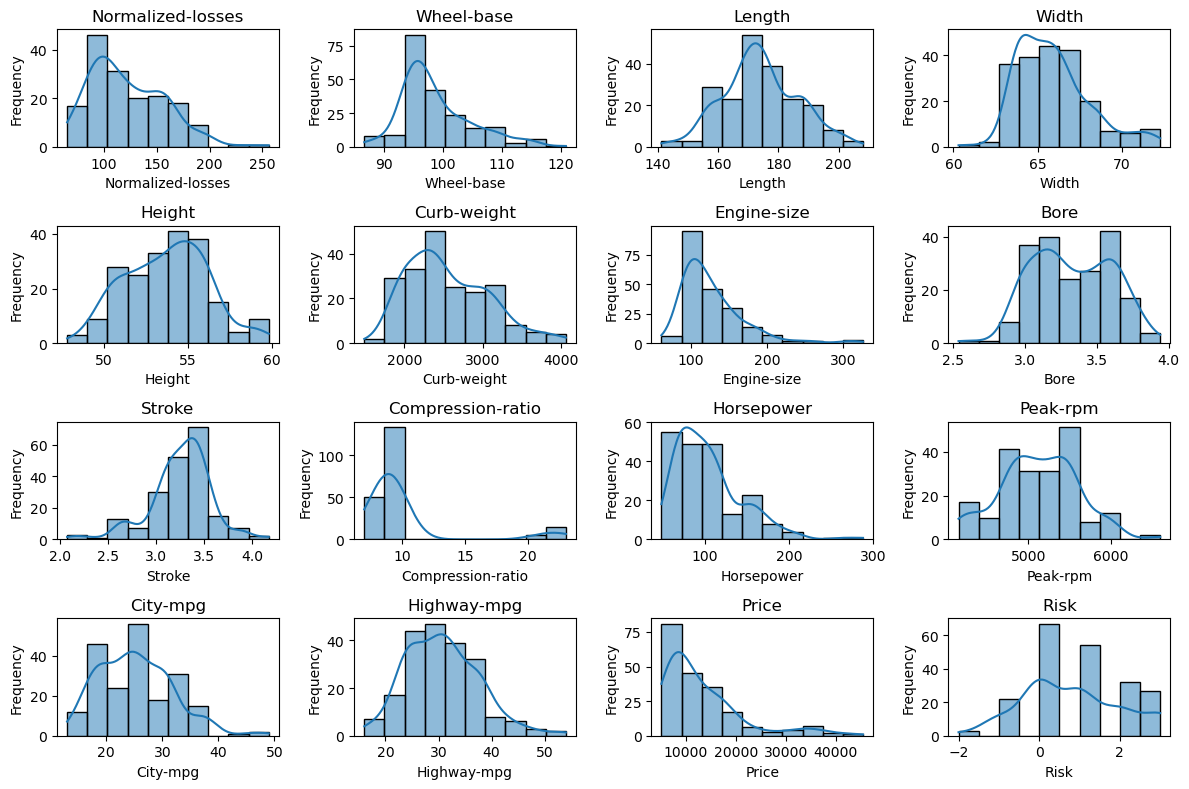

In [11]:
# Define the number of rows and columns for the subplot grid
num_rows, num_cols = 4, 4

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each column and plot histograms in the subplots
for i, column in enumerate(num_df.columns):
    ax = axes[i]  # Select the current subplot
    sns.histplot(num_df[column], ax=ax, bins=10, kde=True)  # Customize with desired options (e.g., bins)
    ax.set_title(f'{column}')
    #ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')


# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

# Forum Session 8.2

- a)  We will imputate missing values using the mean method.

- b) We will split the data to train (70%) and validation (30%)

- c) We will perform feature selection by taking the 5 features with the highest Pearson correlation (in absolute value) with the target variable "Risk". Note that only the training set should be used for the selection process.

- d) We will use sklearn library's LinearRegression library to fit the target variable using the 5 chosen features.

- e) We will measure both the training error and the validation error.

- f) We will repeat steps 3-5 using 10 features, and then using 15 features.

- g) We will repeat steps 3-5 in a loop with 1 feature, 2 features ... 15 features. Then we will plot the training error versus the number of features using matplotlib's plotting library, using a red line. On the same plot, we will plot the validation error, using a blue line.

In [12]:
# importing necessary libraries

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE



### a) imputation using the mean

In [13]:
df = num_df

In [14]:
simple_imputer =SimpleImputer(strategy='mean')

df_imputed = pd.DataFrame(simple_imputer.fit_transform(df), columns=df.columns)


df_imputed


,Normalized-losses,Wheel-base,Length,Width,Height,Curb-weight,Engine-size,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price,Risk
0,168.0,94.5,168.7,64.0,52.6,2169.0,98.0,3.19,3.03,9.0,70.0,4800.0,29.0,34.0,8058.0,1.0
1,113.0,93.1,166.8,64.2,54.1,1950.0,91.0,3.08,3.15,9.0,68.0,5000.0,31.0,38.0,7395.0,1.0
2,87.0,95.7,158.7,63.6,54.5,1985.0,92.0,3.05,3.03,9.0,62.0,4800.0,35.0,39.0,5348.0,1.0
3,125.0,96.3,172.4,65.4,51.6,2365.0,122.0,3.35,3.46,8.5,88.0,5000.0,25.0,32.0,6989.0,1.0
4,148.0,93.7,157.3,63.8,50.6,2191.0,98.0,3.03,3.39,7.6,102.0,5500.0,24.0,30.0,8558.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,65.0,102.4,175.6,66.5,54.9,2414.0,122.0,3.31,3.54,8.7,92.0,4200.0,27.0,32.0,10898.0,-1.0
201,122.0,115.6,202.6,71.7,56.5,3740.0,234.0,3.46,3.10,8.3,155.0,4750.0,16.0,18.0,34184.0,-1.0
202,128.0,94.5,165.3,63.8,54.5,1918.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0,6649.0,1.0
203,186.0,94.5,168.9,68.3,50.2,2778.0,151.0,3.94,3.11,9.5,143.0,5500.0,19.0,27.0,22018.0,3.0


In [15]:
df_imputed.describe()

,Normalized-losses,Wheel-base,Length,Width,Height,Curb-weight,Engine-size,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price,Risk
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353,0.834146
std,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212,1.245307
min,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,-2.000000
25%,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,0.000000
50%,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000,1.000000
75%,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,2.000000
max,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,3.000000


### b. Splitting the df into train/test 

In [16]:
X = df_imputed.drop(columns='Risk', axis=1)
y= df_imputed['Risk']

In [17]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=seed)

### c. Feature Selection of top 5 correlation features with target


In [18]:
#concatenate both df
combined_df = pd.concat([X_train, y_train], axis=1)

#calculate pearson correlation coefficients
corr_coef = combined_df.corr()

#filter top 5 highest correlated features with 'Risk' in absolute values
corr_with_risk = corr_coef['Risk'].abs().sort_values(ascending=False)

corr_with_risk

Risk                 1.000000
Height               0.594587
Wheel-base           0.515240
Normalized-losses    0.505396
Length               0.360938
Peak-rpm             0.260044
Compression-ratio    0.244803
Width                0.200566
Curb-weight          0.193077
Bore                 0.139357
Stroke               0.109022
Price                0.077062
Horsepower           0.074130
Engine-size          0.069741
City-mpg             0.068841
Highway-mpg          0.006748
Name: Risk, dtype: float64

In [19]:
#selecting the top 5 correlated features
top_5_corr = corr_with_risk.index[1:6]
top_5_corr

#selecting the top 10 correlated features
top_10_corr = corr_with_risk.index[1:11]
top_10_corr

#selecting the top 15 correlated features
top_15_corr = corr_with_risk.index[1:]
top_15_corr

Index(['Height', 'Wheel-base', 'Normalized-losses', 'Length', 'Peak-rpm',
       'Compression-ratio', 'Width', 'Curb-weight', 'Bore', 'Stroke', 'Price',
       'Horsepower', 'Engine-size', 'City-mpg', 'Highway-mpg'],
      dtype='object')

### d. Fitting a linear regression model of top 5 correlated features

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_train[top_5_corr], y_train)

y_pred = lin_reg.predict(X_train[top_5_corr])
mse_train = MSE(y_train, y_pred)

y_pred_test = lin_reg.predict(X_test[top_5_corr])
mse_test = MSE(y_test, y_pred_test)

print(f'MSE for the training set: {mse_train}')
print(f'MSE for the validation set: {mse_test}')

MSE for the training set: 0.7363394222585666
MSE for the validation set: 0.8379562374832688


### e. Fitting a linear regression model of top 10 and then 15 correlated features

### 10 features

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_train[top_10_corr], y_train)

y_pred = lin_reg.predict(X_train[top_10_corr])
mse_train = MSE(y_train, y_pred)

y_pred_test = lin_reg.predict(X_test[top_10_corr])
mse_test = MSE(y_test, y_pred_test)

print(f'MSE for the training set: {mse_train}')
print(f'MSE for the validation set: {mse_test}')

MSE for the training set: 0.6611482067328303
MSE for the validation set: 1.0014279052021478


### 15 features 

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_train[top_15_corr], y_train)

y_pred = lin_reg.predict(X_train[top_15_corr])
mse_train = MSE(y_train, y_pred)

y_pred_test = lin_reg.predict(X_test[top_15_corr])
mse_test = MSE(y_test, y_pred_test)

print(f'MSE for the training set: {mse_train}')
print(f'MSE for the validation set: {mse_test}')

MSE for the training set: 0.6063473556480017
MSE for the validation set: 1.0402445244606207


## f. We will repeat steps 3-5 in a loop with 1 feature, 2 features ... 15 features. 

Then we will plot the training error versus the number of features using matplotlib's plotting library, using a red line. On the same plot, we will plot the validation error, using a blue line.

In [23]:
corr_with_risk  # correlation list

Risk                 1.000000
Height               0.594587
Wheel-base           0.515240
Normalized-losses    0.505396
Length               0.360938
Peak-rpm             0.260044
Compression-ratio    0.244803
Width                0.200566
Curb-weight          0.193077
Bore                 0.139357
Stroke               0.109022
Price                0.077062
Horsepower           0.074130
Engine-size          0.069741
City-mpg             0.068841
Highway-mpg          0.006748
Name: Risk, dtype: float64

In [24]:


lin_reg = LinearRegression()
lin_reg.fit(X_train[top_15_corr], y_train)

y_pred = lin_reg.predict(X_train[top_15_corr])
mse_train = MSE(y_train, y_pred)

y_pred_test = lin_reg.predict(X_test[top_15_corr])
mse_test = MSE(y_test, y_pred_test)

print(f'MSE for the training set: {mse_train}')
print(f'MSE for the validation set: {mse_test}')



MSE for the training set: 0.6063473556480017
MSE for the validation set: 1.0402445244606207


In [25]:
## looping over the features and calculating MSE for training and testing datasets
features =[]
mse_training =[]
mse_testing = []

for i in range(2,len(corr_with_risk.index)+1):
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[corr_with_risk.index[1:i]], y_train)

    y_pred = lin_reg.predict(X_train[corr_with_risk.index[1:i]])
    mse_train = MSE(y_train, y_pred)
    
    
    y_pred_test = lin_reg.predict(X_test[corr_with_risk.index[1:i]])
    mse_test = MSE(y_test, y_pred_test)
    
    features.append(i-1)
    mse_training.append(mse_train)
    mse_testing.append(mse_test)
    

    

In [26]:
d = {'features':features, 'mse_train':mse_training, 'mse_test':mse_testing}
plot_errors = pd.DataFrame(d )
plot_errors

,features,mse_train,mse_test
0,1,1.012267,1.313884
1,2,0.959050,1.093597
2,3,0.762031,0.904371
3,4,0.736493,0.833815
4,5,0.736339,0.837956
5,6,0.736140,0.844187
6,7,0.705868,0.808710
7,8,0.702492,0.805745
8,9,0.695088,0.827542
9,10,0.661148,1.001428


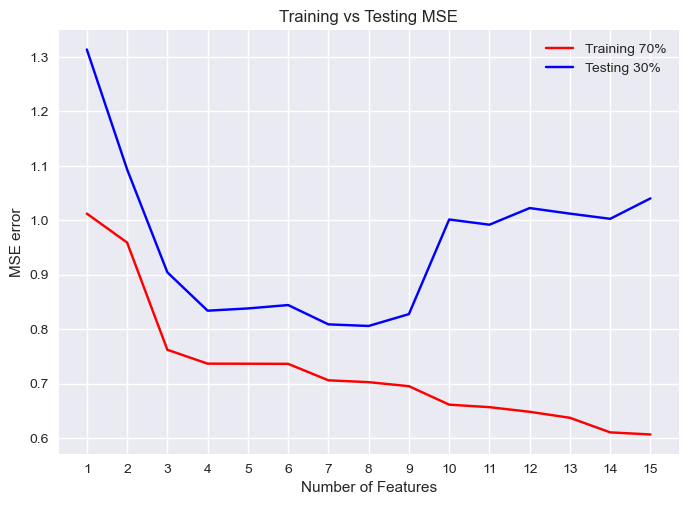

In [27]:
plt.style.use('seaborn')
plt.plot(plot_errors.features, plot_errors.mse_train, color='red', label='Training 70%')
plt.plot(plot_errors.features, plot_errors.mse_test, color='blue', label='Testing 30%')

plt.title('Training vs Testing MSE')
plt.ylabel('MSE error')
plt.xlabel('Number of Features')
plt.xticks(plot_errors.features.values)
plt.legend()
plt.show()



## Extra | Advanced

Advanced activity:

- Repeat step 7 100 times, each time drawing a new train/val split, and generate the red+blue lines using the average of the 100 iterations. 

- This means that, for each number of features i, you will take the average training error and average validation error over 100 runs. 
- This should give you a nice visualization of what overfitting means. What happens if you do a 50-50 train/val split? 30-70?

In [28]:
## looping over the features and calculating MSE for training and testing datasets
features =[]
mse_training =[]
mse_testing = []
test_size = []
train_size =[]

for i in range(100):
    for i in range(2,len(corr_with_risk.index)+1):
        for val in [0.3, 0.5]:
            X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=val)

            lin_reg = LinearRegression()
            lin_reg.fit(X_train[corr_with_risk.index[1:i]], y_train)

            y_pred = lin_reg.predict(X_train[corr_with_risk.index[1:i]])
            mse_train = MSE(y_train, y_pred)
    
    
            y_pred_test = lin_reg.predict(X_test[corr_with_risk.index[1:i]])
            mse_test = MSE(y_test, y_pred_test)
    
            features.append(i-1)
            mse_training.append(mse_train)
            mse_testing.append(mse_test)
            test_size.append(val)
            train_size.append(1-val)
            
    

In [29]:
d = {'features':features, 'mse_train':mse_training, 'mse_test':mse_testing, 'train_size':train_size, 'test_size':test_size}
plot_errors = pd.DataFrame(d )
plot_errors

,features,mse_train,mse_test,train_size,test_size
0,1,1.257333,0.710872,0.7,0.3
1,1,1.189558,1.001164,0.5,0.5
2,2,0.977096,1.013114,0.7,0.3
3,2,1.034219,0.977522,0.5,0.5
4,3,0.811071,0.774673,0.7,0.3
...,...,...,...,...,...
2995,13,0.732656,0.826449,0.5,0.5
2996,14,0.618194,1.010335,0.7,0.3
2997,14,0.673651,0.755549,0.5,0.5
2998,15,0.666551,0.878972,0.7,0.3


In [30]:
plot_errors_avg = plot_errors.groupby(by=['features','train_size'], as_index=False).agg({'mse_train':'mean', 'mse_test':'mean'})

plot_errors_avg

,features,train_size,mse_train,mse_test
0,1,0.5,1.073046,1.130799
1,1,0.7,1.088372,1.113344
2,2,0.5,0.964679,1.034977
3,2,0.7,0.981678,1.009685
4,3,0.5,0.778385,0.846576
5,3,0.7,0.783398,0.847810
6,4,0.5,0.731191,0.817872
7,4,0.7,0.747451,0.800141
8,5,0.5,0.725361,0.833246
9,5,0.7,0.741066,0.817520


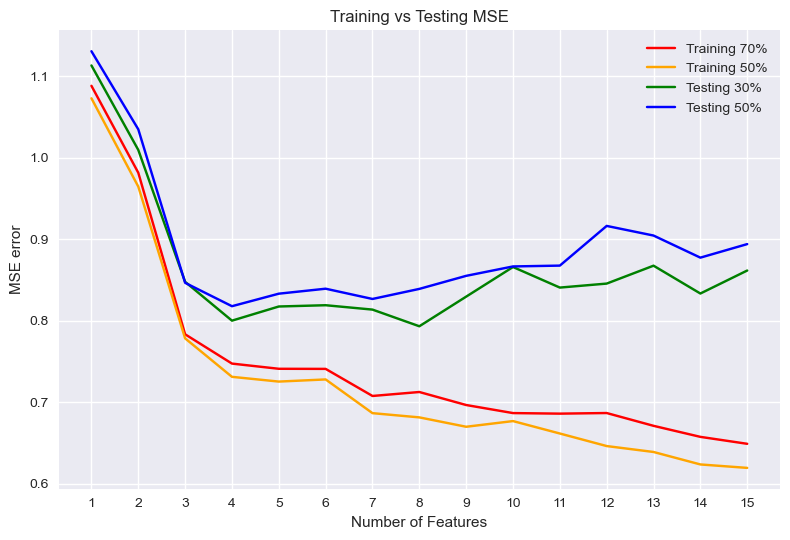

In [32]:
plt.style.use('seaborn')

#training errors
plt.plot(plot_errors_avg['features'].unique(), plot_errors_avg[plot_errors_avg['train_size']==0.7].mse_train, color='red', label='Training 70%')
plt.plot(plot_errors_avg['features'].unique(), plot_errors_avg[plot_errors_avg['train_size']==0.5].mse_train, color='orange', label='Training 50%')

#testing errors
plt.plot(plot_errors_avg['features'].unique(), plot_errors_avg[plot_errors_avg['train_size']==0.7].mse_test, color='green', label='Testing 30%')
plt.plot(plot_errors_avg['features'].unique(), plot_errors_avg[plot_errors_avg['train_size']==0.5].mse_test, color='blue', label='Testing 50%')


plt.title('Training vs Testing MSE')
plt.ylabel('MSE error')
plt.xlabel('Number of Features')
plt.xticks(plot_errors_avg['features'].unique())
plt.legend()
plt.tight_layout()
plt.show()
